# Glass prediction

We are creating model which will predict the Glass which are good in quality

1. EDA(Exploratory Data Analysis)

2. Removing outliers

3. Modelling

4. Saving the model

5. Predicting the result

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


The data contain the 214 rows and 10 columns

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
df.shape

(214, 10)

In [7]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

Data contains the RI, Na and other data as columns

In [8]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

The data does not contain any null value

In [11]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

The data contain type as integer and the other as float type 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


<Axes: >

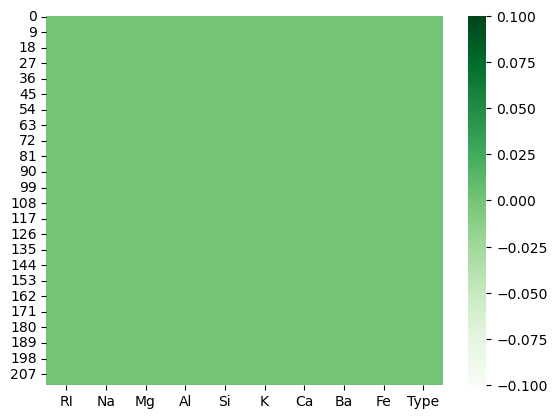

In [14]:
sns.heatmap(df.isnull(),cmap='Greens')

The heatmap shows there is no null values in dataset

In [15]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64


8.03    5
8.43    5
9.57    4
8.79    

In [16]:
df.nunique().to_frame

<bound method Series.to_frame of RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64>

In [17]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [18]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [19]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


From the above statistics we can observe below points:
    
1. only Ca column has the mean greater than median so it shows right hand side distribution
2. The other have mean is lesser than median so it shows lef side distribution
3. There is sudden increase in the value so it shows there may be outliers present and it can be confirmed by boxplot and we can remove it by using Zscore

# Data Visualization

<Axes: xlabel='Type', ylabel='count'>

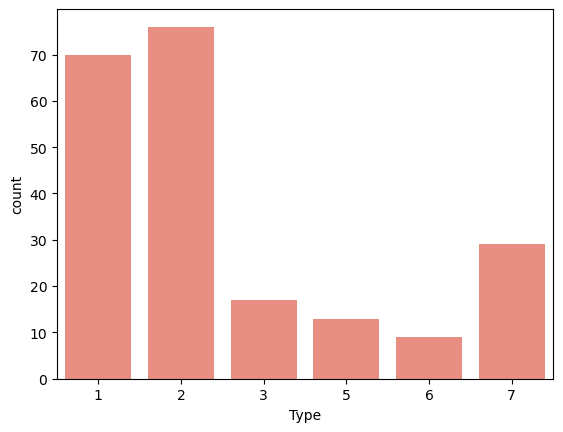

In [21]:
sns.countplot(data=df,x='Type',color='salmon',linewidth=4)

1.The graph shows the type 2 glass has the highest in number followed by type1 glass

2.Type 6 has the lowes in count

In [23]:
ax=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
ay=['Type']

X1=df[ax]

Y1=df[ay]

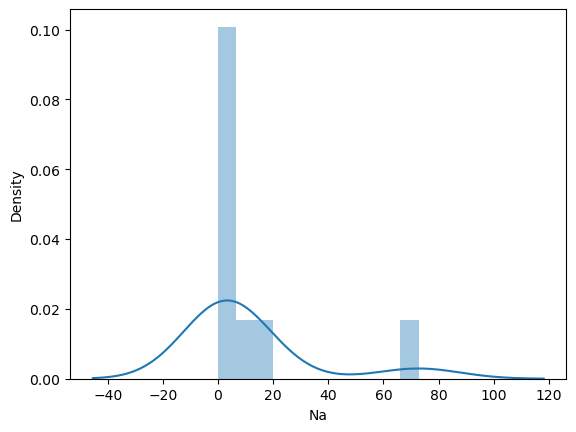

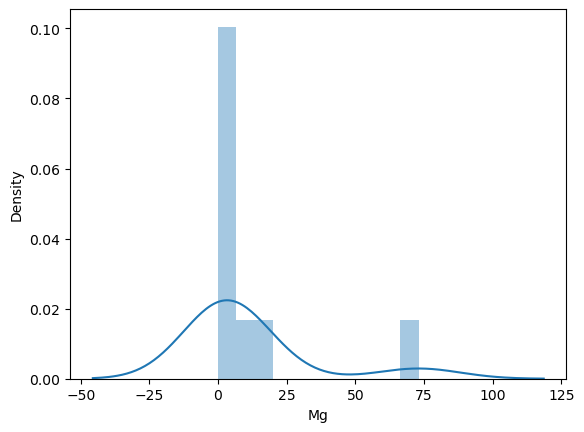

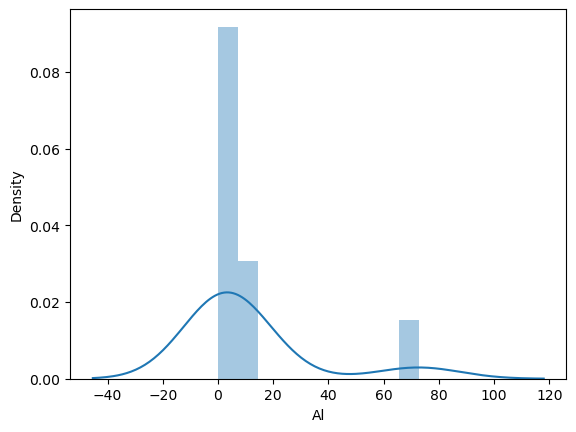

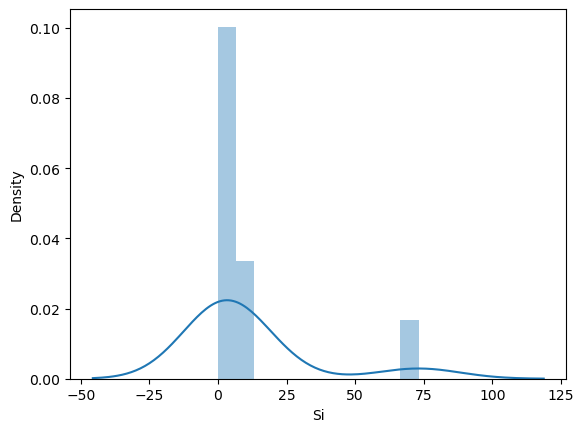

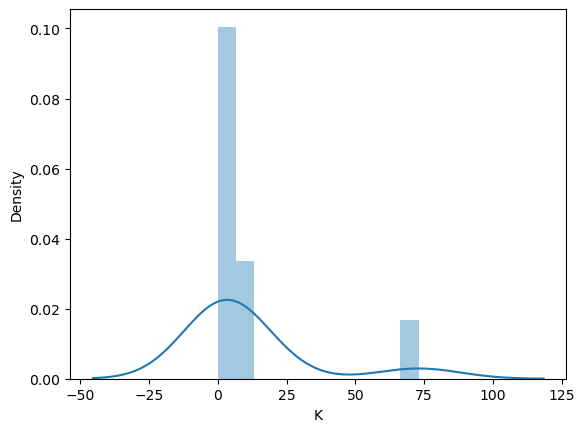

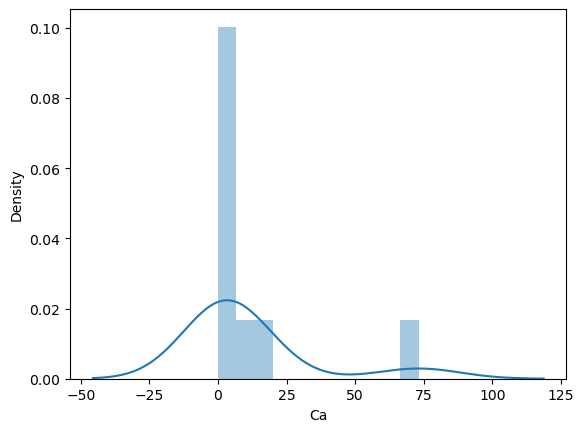

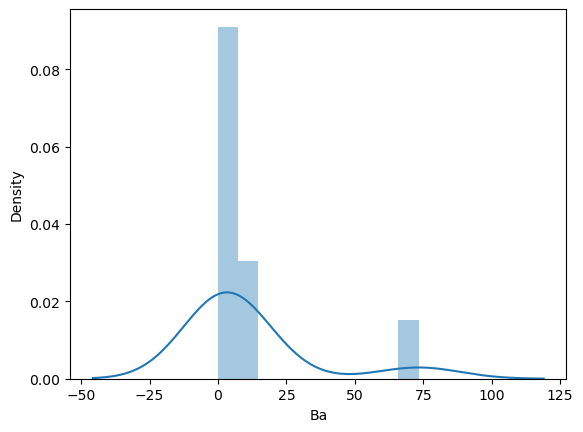

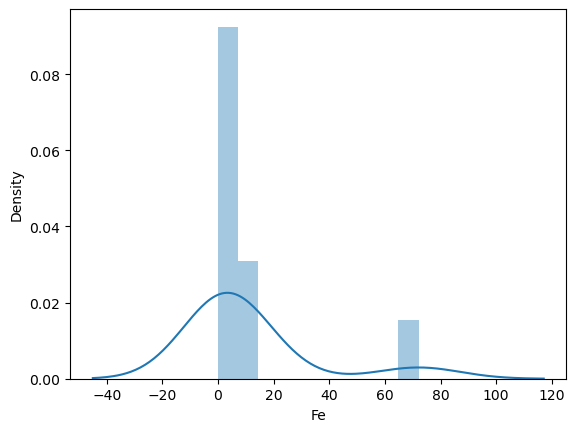

In [27]:
x1=X1.values

for i in range(1,9):
    sns.distplot(x1[i])
    plt.xlabel(ax[i])
    plt.show()

In [29]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<Axes: >

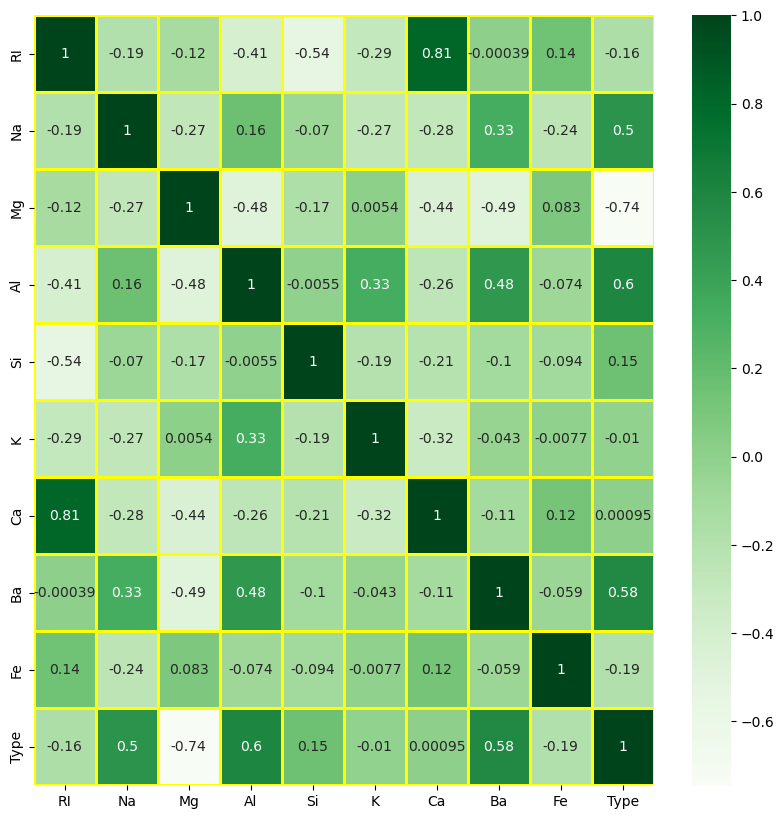

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens',linewidths=2,linecolor='yellow')

1. The calcium, Na,Al,Si, Ba gives positive correlation to type

2. The RI,Mg,K,Fe gives negative coorelation to type

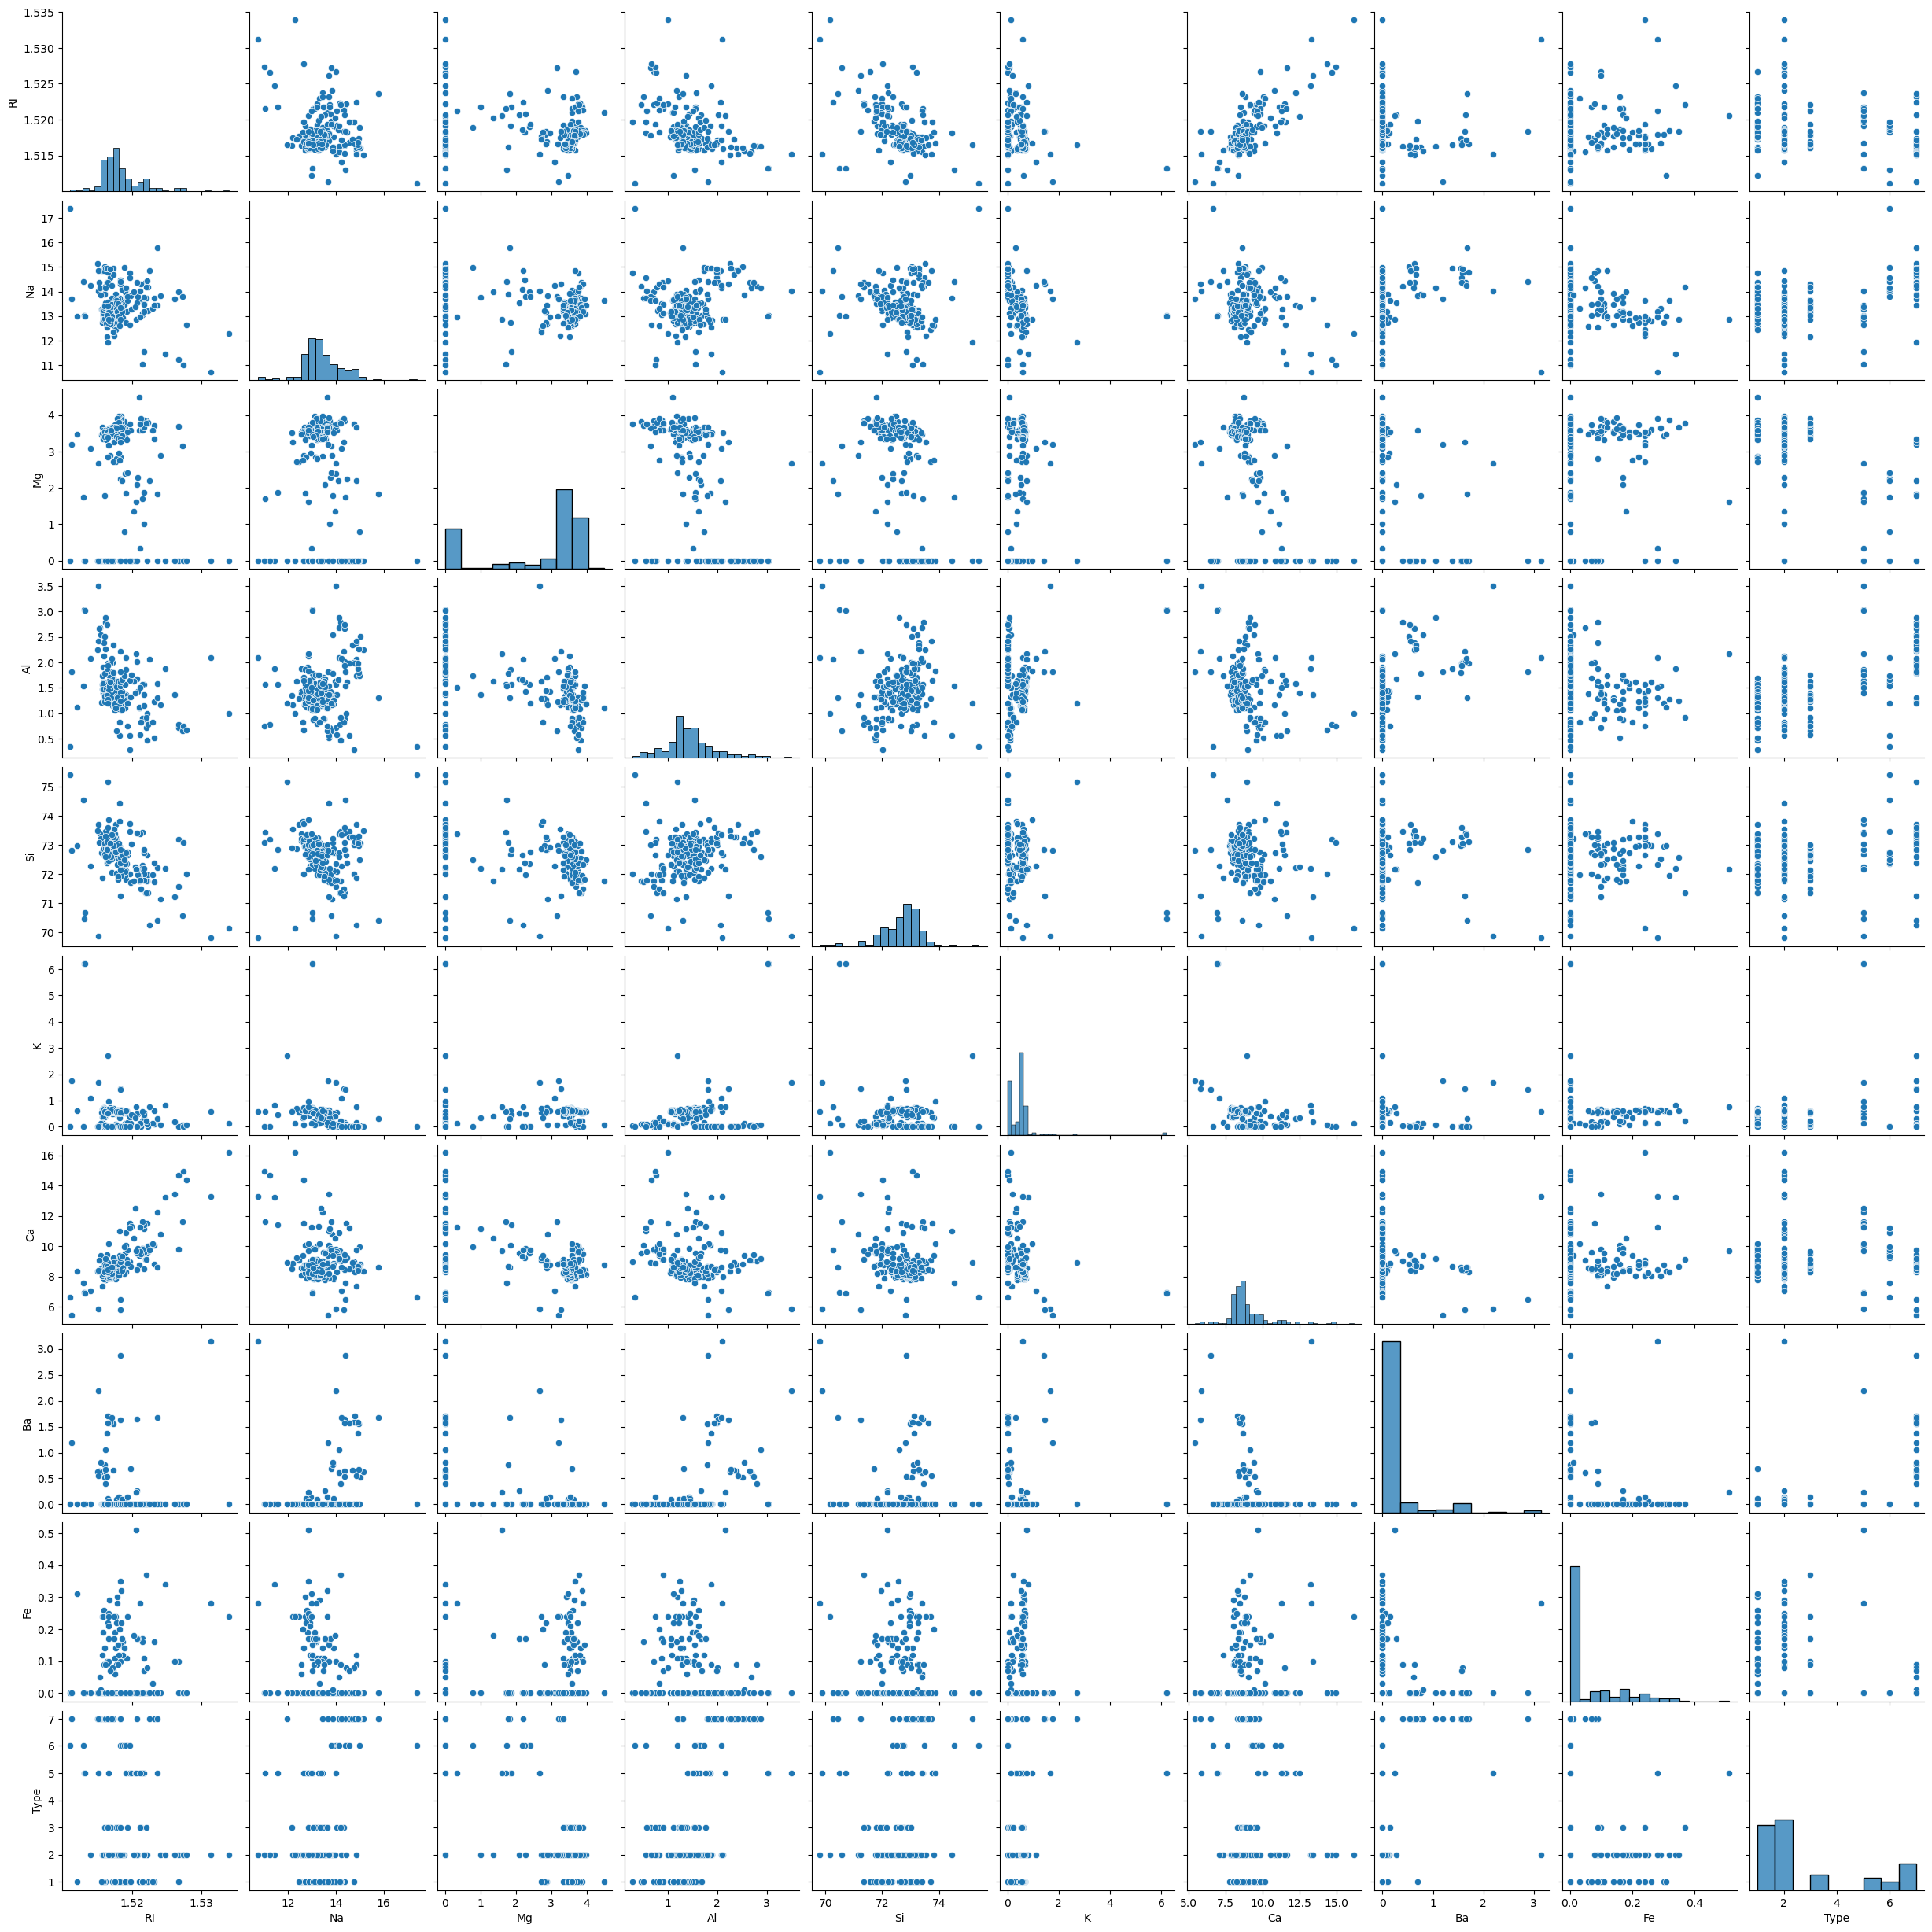

In [34]:
sns.pairplot(data=df,palette='Dark2')

RI         Axes(0.125,0.653529;0.110714x0.226471)
Na      Axes(0.257857,0.653529;0.110714x0.226471)
Mg      Axes(0.390714,0.653529;0.110714x0.226471)
Al      Axes(0.523571,0.653529;0.110714x0.226471)
Si      Axes(0.656429,0.653529;0.110714x0.226471)
K       Axes(0.789286,0.653529;0.110714x0.226471)
Ca         Axes(0.125,0.381765;0.110714x0.226471)
Ba      Axes(0.257857,0.381765;0.110714x0.226471)
Fe      Axes(0.390714,0.381765;0.110714x0.226471)
Type    Axes(0.523571,0.381765;0.110714x0.226471)
dtype: object

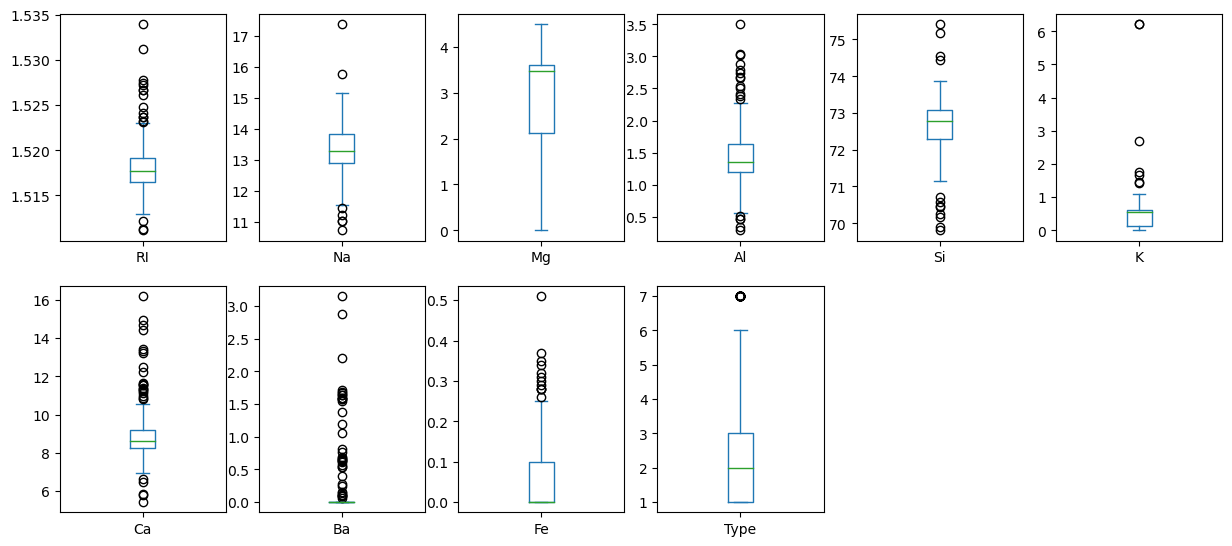

In [36]:
df.plot(subplots=True,kind='box',layout=(3,6),figsize=(15,10))

From the above boxplot we can observed that the RI,Na,Al,Si,K,Ca, Ba and Fe has the outliers so we can remove the outliers by using Zscore

In [37]:
from scipy.stats import zscore
dfscore=np.abs(zscore(df))
print(np.where(dfscore>3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))


In [38]:
dfnew=df[(dfscore<3).all(axis=1)]
dfnew

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [40]:
df.shape

(214, 10)

In [42]:
dfnew.shape

(194, 10)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [45]:
X1.head(2)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [46]:
Y1.head(2)

,Type
0,1
1,1


In [47]:
from sklearn import preprocessing
X1=preprocessing.scale(X1)

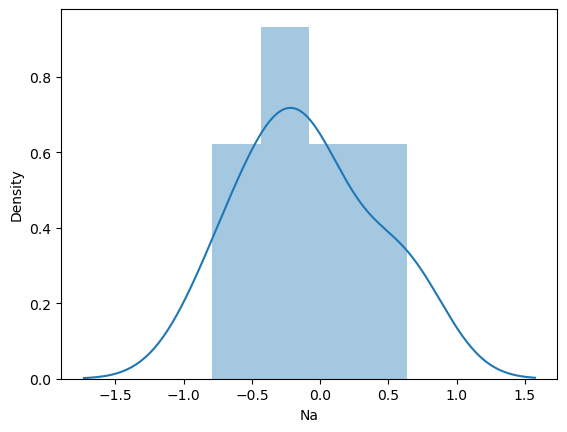

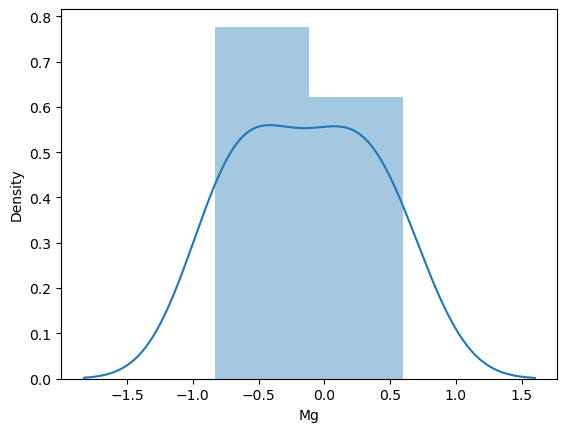

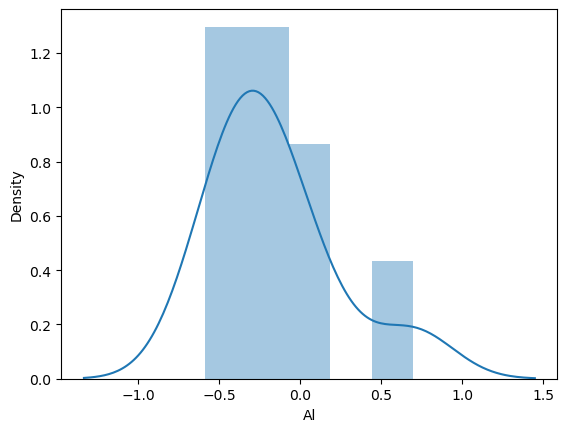

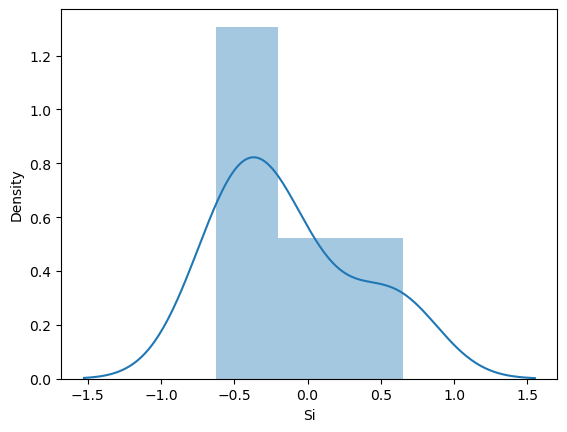

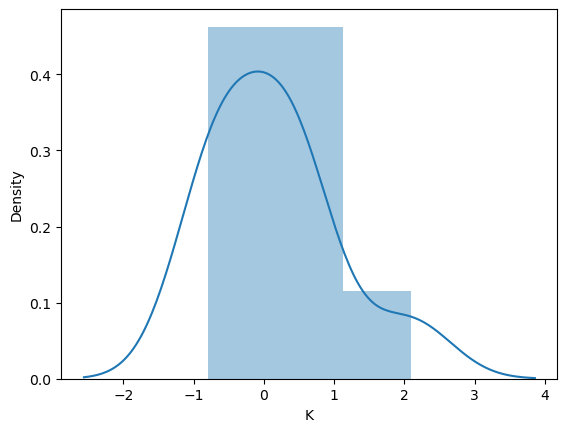

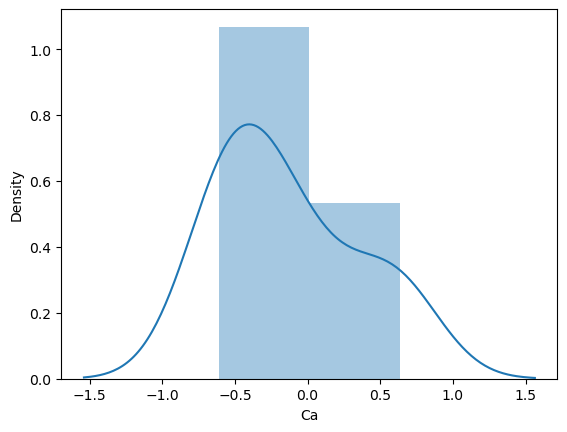

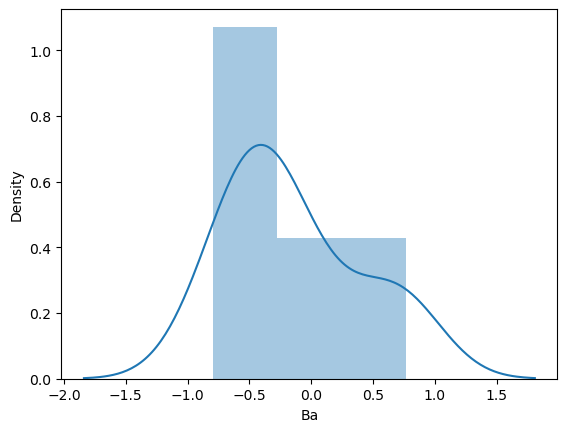

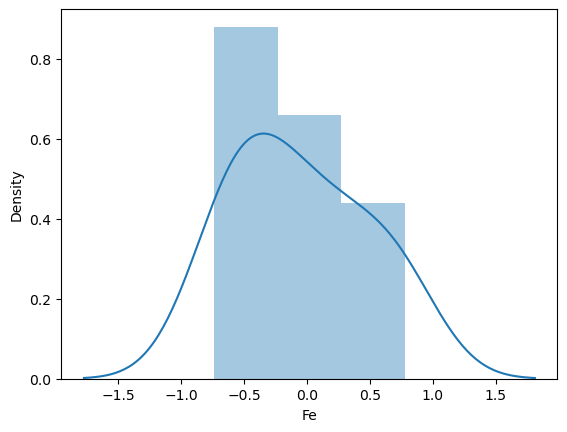

In [49]:
x1=X1

for i in range(1,9):
    sns.distplot(x1[i])
    plt.xlabel(ax[i])
    plt.show()

In [50]:
Y1.value_counts()

Type
2       76
1       70
7       29
3       17
5       13
6        9
dtype: int64

In [54]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(X1,Y1)

Defaulting to user installation because normal site-packages is not writeable


In [55]:
y1.value_counts()

Type
1       76
2       76
3       76
5       76
6       76
7       76
dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [57]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"at random_state",maxRS)

Best Accuracy is 0.948905109489051 at random_state 2


In [59]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
etpred=ET.predict(x_test)
print('accuracy score',accuracy_score(y_test,etpred))
print('confusion matrix',confusion_matrix(y_test,etpred))
print('classification report',classification_report(y_test,etpred))

accuracy score 0.9197080291970803
confusion matrix [[20  3  2  0  0  0]
 [ 4 18  1  0  0  0]
 [ 0  0 24  0  0  0]
 [ 0  0  0 23  0  0]
 [ 0  0  0  0 22  0]
 [ 0  1  0  0  0 19]]
classification report               precision    recall  f1-score   support

           1       0.83      0.80      0.82        25
           2       0.82      0.78      0.80        23
           3       0.89      1.00      0.94        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        22
           7       1.00      0.95      0.97        20

    accuracy                           0.92       137
   macro avg       0.92      0.92      0.92       137
weighted avg       0.92      0.92      0.92       137



In [60]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
lrpred=LR.predict(x_test)
print("accuracy score",accuracy_score(y_test,lrpred))
print('confusion matrix',confusion_matrix(y_test,lrpred))
print('classification report',classification_report(y_test,lrpred))

accuracy score 0.8102189781021898
confusion matrix [[17  3  5  0  0  0]
 [ 6  9  7  1  0  0]
 [ 3  0 21  0  0  0]
 [ 0  0  0 23  0  0]
 [ 0  0  0  0 22  0]
 [ 0  1  0  0  0 19]]
classification report               precision    recall  f1-score   support

           1       0.65      0.68      0.67        25
           2       0.69      0.39      0.50        23
           3       0.64      0.88      0.74        24
           5       0.96      1.00      0.98        23
           6       1.00      1.00      1.00        22
           7       1.00      0.95      0.97        20

    accuracy                           0.81       137
   macro avg       0.82      0.82      0.81       137
weighted avg       0.81      0.81      0.80       137



In [62]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
rfcpred=RFC.predict(x_test)
print('accuracy score',accuracy_score(y_test,rfcpred))
print('classification report',classification_report(y_test,rfcpred))
print('confusion matrix',confusion_matrix(y_test,rfcpred))

accuracy score 0.927007299270073
classification report               precision    recall  f1-score   support

           1       0.83      0.80      0.82        25
           2       0.95      0.83      0.88        23
           3       0.83      1.00      0.91        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        22
           7       1.00      0.95      0.97        20

    accuracy                           0.93       137
   macro avg       0.94      0.93      0.93       137
weighted avg       0.93      0.93      0.93       137

confusion matrix [[20  1  4  0  0  0]
 [ 3 19  1  0  0  0]
 [ 0  0 24  0  0  0]
 [ 0  0  0 23  0  0]
 [ 0  0  0  0 22  0]
 [ 1  0  0  0  0 19]]


In [76]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knnpred=knn.predict(x_test)
print('accuracy score',accuracy_score(y_test,knnpred))
print('classification report',classification_report(y_test,knnpred))
print('confusion matrix',confusion_matrix(y_test,knnpred))

accuracy score 0.8102189781021898
classification report               precision    recall  f1-score   support

           1       0.61      0.68      0.64        25
           2       0.69      0.39      0.50        23
           3       0.74      0.96      0.84        24
           5       0.96      1.00      0.98        23
           6       0.92      1.00      0.96        22
           7       1.00      0.85      0.92        20

    accuracy                           0.81       137
   macro avg       0.82      0.81      0.81       137
weighted avg       0.81      0.81      0.80       137

confusion matrix [[17  4  4  0  0  0]
 [ 9  9  4  1  0  0]
 [ 1  0 23  0  0  0]
 [ 0  0  0 23  0  0]
 [ 0  0  0  0 22  0]
 [ 1  0  0  0  2 17]]


In [64]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtcpred=dtc.predict(x_test)
print('accuracy score',accuracy_score(y_test,dtcpred))
print('confusion matrix',confusion_matrix(y_test,dtcpred))
print('classification report',classification_report(y_test,dtcpred))

accuracy score 0.8540145985401459
confusion matrix [[16  5  3  0  0  1]
 [ 4 18  1  0  0  0]
 [ 5  0 19  0  0  0]
 [ 0  0  0 23  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  1  0 19]]
classification report               precision    recall  f1-score   support

           1       0.64      0.64      0.64        25
           2       0.78      0.78      0.78        23
           3       0.83      0.79      0.81        24
           5       0.96      1.00      0.98        23
           6       1.00      1.00      1.00        22
           7       0.95      0.95      0.95        20

    accuracy                           0.85       137
   macro avg       0.86      0.86      0.86       137
weighted avg       0.85      0.85      0.85       137



In [82]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abcpred=abc.predict(x_test)
print('accuracy score',accuracy_score(y_test,abcpred))
print('confusion matrix',confusion_matrix(y_test,abcpred))
print('classification report',classification_report(y_test,abcpred))

accuracy score 0.40875912408759124
confusion matrix [[ 0  3 22  0  0  0]
 [ 0  4 18  1  0  0]
 [ 0  1 23  0  0  0]
 [ 0  0  0 19  0  4]
 [ 0 22  0  0  0  0]
 [ 0 10  0  0  0 10]]
classification report               precision    recall  f1-score   support

           1       0.00      0.00      0.00        25
           2       0.10      0.17      0.13        23
           3       0.37      0.96      0.53        24
           5       0.95      0.83      0.88        23
           6       0.00      0.00      0.00        22
           7       0.71      0.50      0.59        20

    accuracy                           0.41       137
   macro avg       0.35      0.41      0.35       137
weighted avg       0.34      0.41      0.35       137



In [72]:
svc=SVC()
svc.fit(x_train,y_train)
svcpred=svc.predict(x_test)
print('accuracy score',accuracy_score(y_test,svcpred))
print('classification report',classification_report(y_test,svcpred))
print('confusion report',confusion_matrix(y_test,svcpred))

accuracy score 0.8248175182481752
classification report               precision    recall  f1-score   support

           1       0.62      0.72      0.67        25
           2       0.82      0.39      0.53        23
           3       0.67      0.92      0.77        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        22
           7       1.00      0.95      0.97        20

    accuracy                           0.82       137
   macro avg       0.85      0.83      0.82       137
weighted avg       0.84      0.82      0.82       137

confusion report [[18  2  5  0  0  0]
 [ 8  9  6  0  0  0]
 [ 2  0 22  0  0  0]
 [ 0  0  0 23  0  0]
 [ 0  0  0  0 22  0]
 [ 1  0  0  0  0 19]]


# Cross val score

In [67]:
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print(accuracy_score(y_test,rfcpred)-score.mean())

[0.86956522 0.83516484 0.85714286 0.85714286 0.94505495]
0.8728141423793598
0.054193156890713134


In [69]:
score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print(accuracy_score(y_test,etpred)-score.mean())

[0.90217391 0.87912088 0.85714286 0.83516484 0.91208791]
0.8771380793119924
0.04256994988508789


In [70]:
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print(accuracy_score(y_test,lrpred)-score.mean())

[0.79347826 0.79120879 0.78021978 0.8021978  0.81318681]
0.7960582895365503
0.014160688565639457


In [77]:
score=cross_val_score(knn,x1,y1)
print(score)
print(score.mean())
print(accuracy_score(y_test,knnpred)-score.mean())

[0.82608696 0.82417582 0.76923077 0.83516484 0.87912088]
0.8267558528428094
-0.0165368747406196


In [78]:
score=cross_val_score(dtc,x1,y1)
print(score)
print(score.mean())
print(accuracy_score(y_test,dtcpred)-score.mean())

[0.7826087  0.79120879 0.84615385 0.74725275 0.83516484]
0.8004777830864788
0.053536815453667175


In [83]:
score=cross_val_score(abc,x1,y1)
print(score)
print(score.mean())
print(accuracy_score(y_test,abcpred)-score.mean())

[0.39130435 0.32967033 0.42857143 0.32967033 0.36263736]
0.36837075967510746
0.04038836441248378


In [84]:
score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print(accuracy_score(y_test,svcpred)-score.mean())

[0.7826087  0.82417582 0.79120879 0.78021978 0.91208791]
0.8180602006688963
0.0067573175792788875


Since cross val score for Kneighbor is less we use KNeighbor as our model

# Hyperparameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
grid_params={'n_neighbors':[5,7,9,11,13,15],
            'weights':['uniform','distnace'],
            'metric':['minkowski','euclidean','manhattan']}

In [87]:
GV=GridSearchCV(KNeighborsClassifier(),grid_params,cv=5)

In [88]:
GV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distnace']})

In [89]:
GV.best_score_

0.8464781746031746

In [90]:
GV.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

In [91]:
Model=KNeighborsClassifier(metric='manhattan',n_neighbors=5,weights='uniform')
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
Acc=accuracy_score(y_test,pred)
print(Acc*100)

81.75182481751825


# Saving the Model

In [92]:
import joblib
joblib.dump(Model,'Glass Prediction.pkl')

['Glass Prediction.pkl']

In [94]:
Model1=joblib.load('Glass Prediction.pkl')
Prediction=Model1.predict(x_test)
Prediction

array([3, 1, 5, 7, 3, 3, 3, 6, 6, 7, 3, 7, 1, 1, 6, 6, 5, 5, 6, 6, 2, 6,
       7, 2, 7, 3, 3, 2, 1, 6, 1, 1, 1, 6, 7, 7, 1, 3, 3, 3, 5, 1, 1, 5,
       6, 2, 5, 6, 3, 2, 1, 5, 3, 5, 5, 7, 3, 6, 3, 3, 3, 2, 1, 3, 2, 3,
       6, 5, 7, 5, 3, 7, 2, 2, 1, 5, 3, 2, 5, 2, 7, 3, 1, 6, 7, 5, 5, 1,
       2, 6, 5, 6, 6, 1, 2, 6, 7, 3, 1, 5, 5, 7, 7, 5, 1, 3, 7, 1, 3, 3,
       1, 3, 1, 3, 3, 3, 6, 5, 1, 6, 2, 1, 3, 6, 1, 2, 1, 5, 1, 7, 6, 1,
       7, 5, 6, 3, 5], dtype=int64)

In [95]:
Data=np.array(y_test)
df1=pd.DataFrame()
df1['Predict']=Prediction
df1['Original']=Data
df1

,Predict,Original
0,3,3
1,1,1
2,5,5
3,7,7
4,3,3
...,...,...
132,7,7
133,5,5
134,6,6
135,3,2
